##Методические указания

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()


In [5]:
type(california)


sklearn.utils._bunch.Bunch

In [6]:
california.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(type(california.data), type(california.target))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
print(california.data.shape, california.target.shape)


(20640, 8) (20640,)


In [9]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.describe().round(2)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [12]:
y = data['Price']
X = data.drop('Price', axis=1)


In [13]:
y.shape, X.shape


((20640,), (20640, 8))

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [15]:
print("Coefficients: \n", model.coef_)


Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [16]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]


MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [17]:
print("Intercept: \n", model.intercept_)


Intercept: 
 -36.94192020718441


In [18]:
y_pred = model.predict(X)
print(y_pred[:5])


[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [19]:
print(y[:5])


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


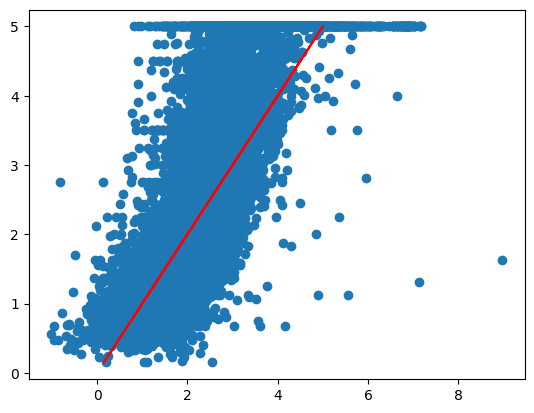

In [20]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')


In [21]:
model.score(X, y)


0.606232685199805

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)


In [23]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)


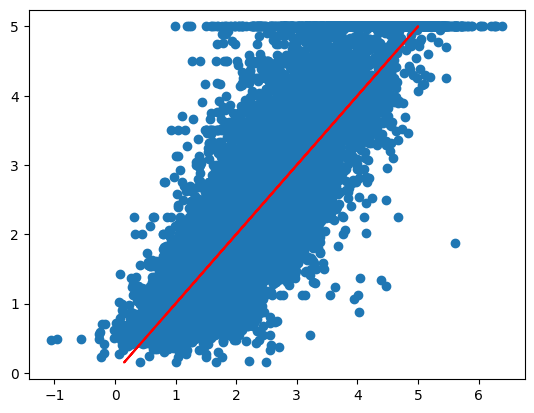

In [24]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')


In [25]:
polynomial.score(poly, y)


0.7460745292501869

##Задания для самостоятельного выполнения

###Задание №1

Кросс-валидация

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Можно вывести среднее значение MSE
mean_mse = -scores.mean()
print(f'Среднее MSE: {mean_mse}')


Среднее MSE: 0.5582901717686546


Оценка остатков

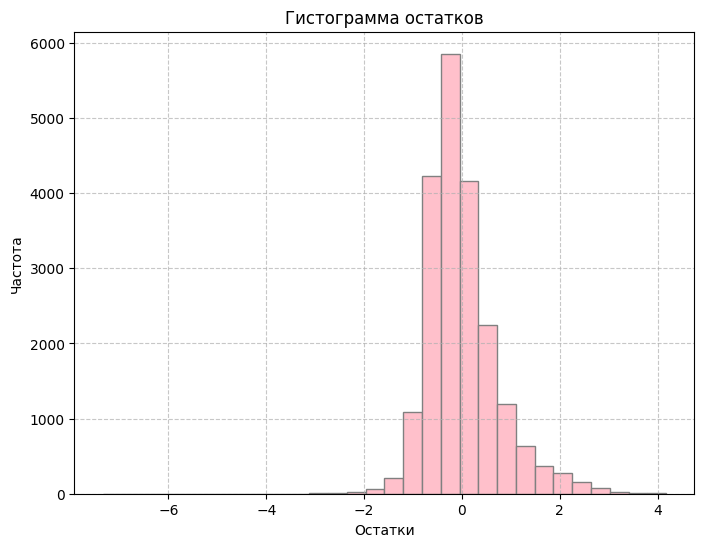

In [27]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='pink', edgecolor='gray')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()


Регуляризация

In [28]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=0.01)  # Подбираем оптимальное значение alpha
lasso_model.fit(X, y)

lasso_score = lasso_model.score(X, y)
print(f'Lasso R^2 Score: {lasso_score}')


Lasso R^2 Score: 0.6024178576491683


Подбор параметров

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')


Best Alpha: 0.01


###Задание №2

####Метод опорных векторов


a. Без ядра

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

svm_model = SVR(kernel='linear', epsilon=0.9)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
print(f'Оценка R^2 модели SVM без ядра: {r2_svm}')

plt.scatter(y_test, y_pred_svm)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (SVM без ядра)')
plt.show()


b. С гауссовым ядром

Оценка R^2 модели SVM с гауссовым ядром (RBF): -0.01648536010717372


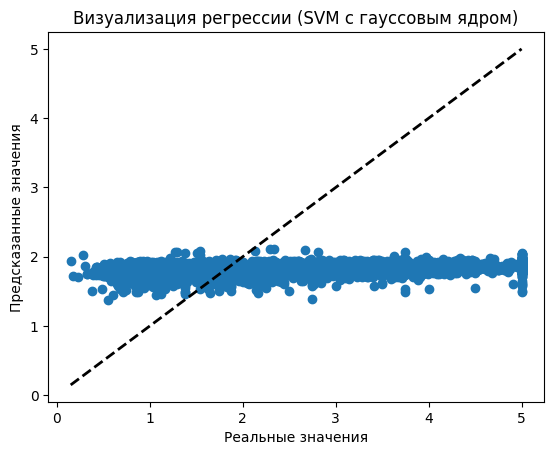

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


svm_rbf_model = SVR(kernel='rbf')

svm_rbf_model.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf_model.predict(X_test)

r2_svm_rbf = r2_score(y_test, y_pred_svm_rbf)
print(f'Оценка R^2 модели SVM с гауссовым ядром (RBF): {r2_svm_rbf}')

plt.scatter(y_test, y_pred_svm_rbf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (SVM с гауссовым ядром)')
plt.show()

c. С полиномиальным ядром

Оценка R^2 модели SVM с полиномиальным ядром: -0.029150146610038785


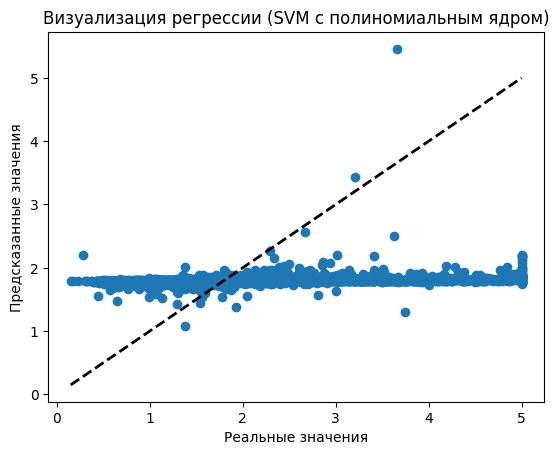

In [ ]:
svm_poly_model = SVR(kernel='poly', degree=3)

svm_poly_model.fit(X_train, y_train)

y_pred_svm_poly = svm_poly_model.predict(X_test)

r2_svm_poly = r2_score(y_test, y_pred_svm_poly)
print(f'Оценка R^2 модели SVM с полиномиальным ядром: {r2_svm_poly}')

plt.scatter(y_test, y_pred_svm_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (SVM с полиномиальным ядром)')
plt.show()

####Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
print(f'Оценка R^2 модели KNN регрессии: {r2_knn}')

plt.scatter(y_test, y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (KNN регрессия)')
plt.show()


####Многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

r2_mlp = r2_score(y_test, y_pred_mlp)
print(f'Оценка R^2 модели MLP: {r2_mlp}')

plt.scatter(y_test, y_pred_mlp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (MLP)')
plt.show()


####Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
print(f'Оценка R^2 модели дерева решений: {r2_tree}')

plt.scatter(y_test, y_pred_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (Дерево решений)')
plt.show()


####Другие методы

a. Гребневая регрессия

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Оценка R^2 модели гребневой регрессии: {r2_ridge}')

plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (Гребневая регрессия)')
plt.show()


b. Регрессия Лассо

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)


lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Оценка R^2 модели регрессии Лассо: {r2_lasso}')

plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (Регрессия Лассо)')
plt.show()


c. Регрессия ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Укажите значения alpha и l1_ratio по вашему выбору

elasticnet_model.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_model.predict(X_test)

r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f'Оценка R^2 модели регрессии ElasticNet: {r2_elasticnet}')

plt.scatter(y_test, y_pred_elasticnet)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (ElasticNet)')
plt.show()


d. Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Укажите количество деревьев (n_estimators) по вашему выбору

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

r2_random_forest = r2_score(y_test, y_pred_random_forest)
print(f'Оценка R^2 модели случайного леса: {r2_random_forest}')

plt.scatter(y_test, y_pred_random_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (Случайный лес)')
plt.show()


e. Беггинг

In [ ]:
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = LinearRegression()

bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)  # Укажите количество базовых моделей (n_estimators) по вашему выбору

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

r2_bagging = r2_score(y_test, y_pred_bagging)
print(f'Оценка R^2 модели с беггингом: {r2_bagging}')

plt.scatter(y_test, y_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация регрессии (Беггинг)')
plt.show()


###Задание №3

Linear Regression: Оценка R^2 - 0.5758


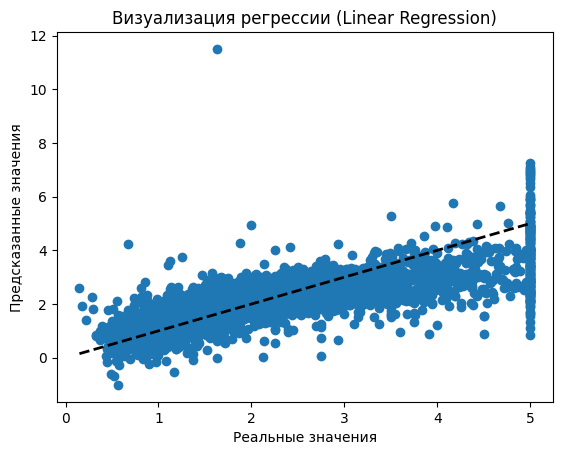

Ridge Regression: Оценка R^2 - 0.5759


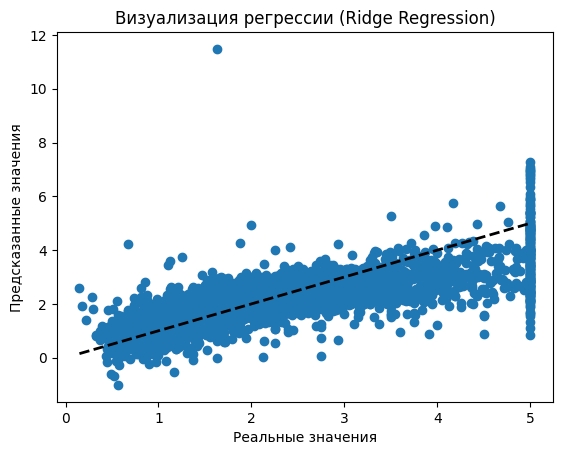

Lasso Regression: Оценка R^2 - 0.2842


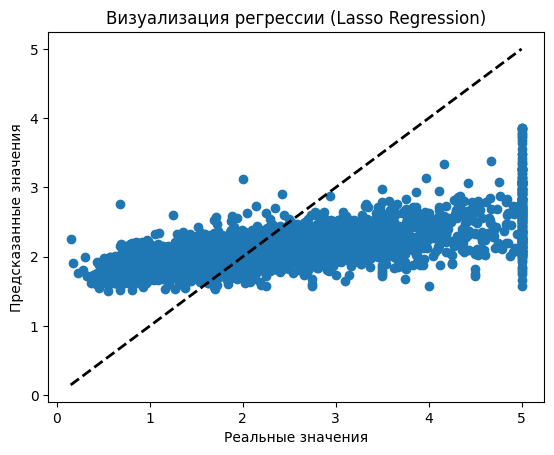

ElasticNet Regression: Оценка R^2 - 0.4166


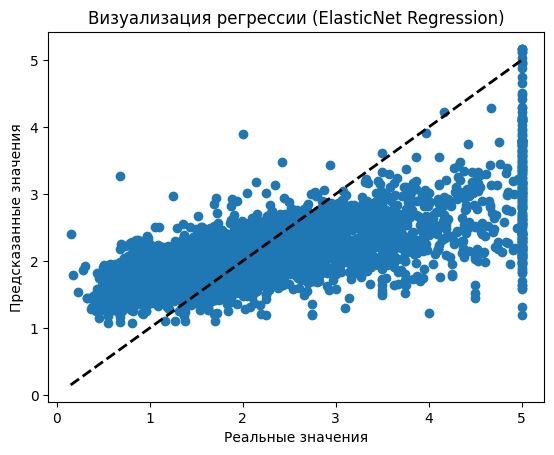

Random Forest: Оценка R^2 - 0.8051


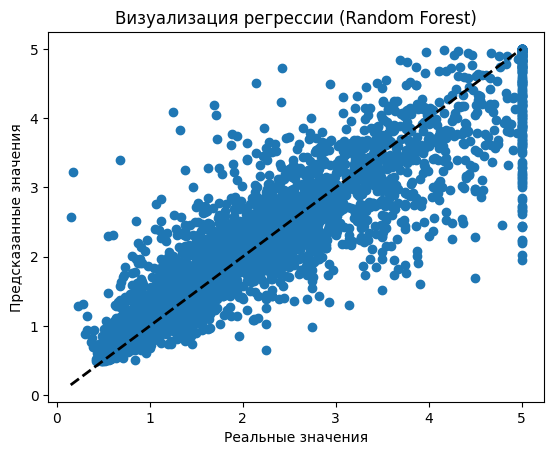

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging: Оценка R^2 - 0.5772


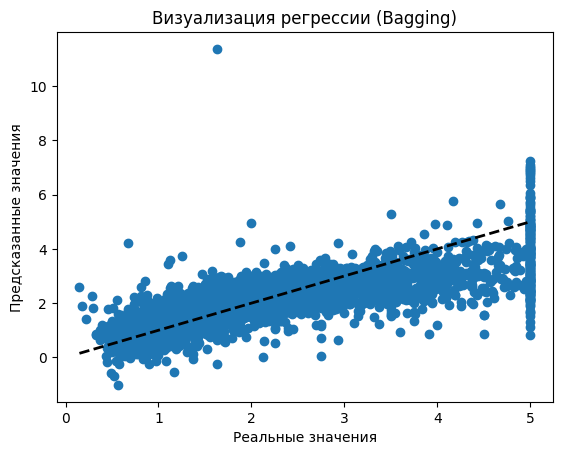

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def train_and_evaluate_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Bagging": BaggingRegressor(base_estimator=LinearRegression(), n_estimators=100, random_state=42),
        "Support Vector Machine": SVR(kernel='linear')
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f'{name}: Оценка R^2 - {r2:.4f}')

        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel('Реальные значения')
        plt.ylabel('Предсказанные значения')
        plt.title(f'Визуализация регрессии ({name})')
        plt.show()

train_and_evaluate_models(X, y)


###Задание №4

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

diabetes = load_diabetes(as_frame=True)
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print(X_diabetes.head())
print(X_diabetes.info())

#train_and_evaluate_models(X_diabetes, y_diabetes)


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 n